<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/ProyectoML/Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [54]:
def Plotter(e):

  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)
  ax.set_title('{:.0f}'.format(e),fontsize=10)

  return ax,ax1

In [55]:
class Robot:

  # Definir el contructor
  def __init__(self, f, rate ,Id=0):

    # Id del robot
    self.Id = Id
    # Posicion robot
    self.r = np.random.uniform(-1,1)
    # Funcion a minimizar
    self.f = f
    # Fitness
    self.Fitness = self.f(self.r)
    # Mutation rate
    self.rate = rate

  # Setters
  def SetR(self,r):
    self.r = r

  def SetFitness(self):
    self.Fitness = self.f(self.r)

  # Getters
  def GetR(self):
    return self.r

  def GetFitness(self):
    return self.Fitness

  # Mutations
  def Mutate(self):
    self.r += np.random.normal(0,self.rate)

In [56]:
f = lambda x: x**2 + 10*np.sin(x)

In [58]:
r1 = Robot(f,0.1)
r1.f(0.6)

6.006424733950354

In [59]:
def GetRobots(N):

  Robots = []
  for i in range(N):
    r = Robot(f,0.5,i)
    Robots.append(r)

  return Robots

In [60]:
Robots = GetRobots(10)

In [61]:
def Genetic(Robots, epochs = 30):

  t = np.linspace(-2,2,50)
  # Fitness en cada evolucion
  Fitness = np.array([])

  for e in range(epochs):

    clear_output(wait = True)

    ax,ax1 = Plotter(e)

    for i, p in enumerate(Robots):
      p.Mutate()
      p.SetFitness()


    #score = [ (p.Fitness, p) for p in Robots ]
    #print(score[0][0])

    # Pintar los robots
    ax.plot(t,f(t),color='k')
    for i, p in enumerate(Robots):
      ax.scatter(p.GetR(), p.GetFitness(), marker='o' ,color='r')

    # Pintal el fitness promedio
    Fitness_ = [ p.GetFitness() for i, p in enumerate(Robots) ]
    #print(Fitness_)
    Fitness = np.append(Fitness, np.mean(Fitness_))
    ax1.plot(Fitness,color='k')

    plt.show()
    plt.pause(0.001)

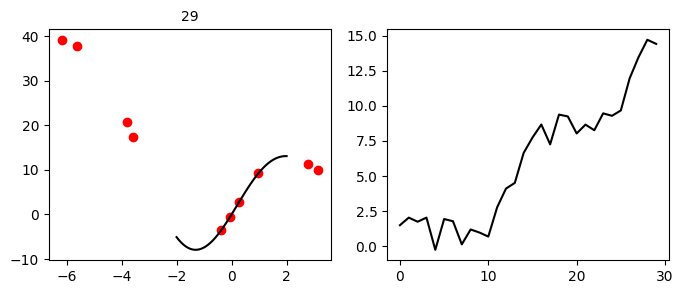

In [62]:
Genetic(Robots)